In [15]:
import tensorflow as tf
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
import pathlib
import annotation, misc, hyspec_cnn

In [3]:
# Paths
json_gray = '/media/mha114/Massimal/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/M_Annotation/20210825_Olbergholmen_Annotation_20230228_gray/label_classes.json'
annotation_dir = '/media/mha114/Massimal/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/M_Annotation/20210825_Olbergholmen_Annotation_20230228_gray/OlbergAreaS'
hyspec_dir = '/media/mha114/Massimal/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/4_Rad_Georef_SGC'
tiles_dir = '/media/mha114/Massimal/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/4b_Rad_Georef_SGC_Tiles'

In [ ]:
# Instructions for merging / extracting classes
classes_to_merge = [['Zostera marina - dominant','Zostera marina - normal','Zostera marina - sparse'],
                    ['Rockweed','Rockweed with turf algae','Fucus serratus','Saccharina latissima'],
                    ['Turf algae - dominant','Turf algae - normal','Turf algae - sparse','Aegagropila (algae ball)']]
merged_class_names = ['Zostera marina',
                      'Rockweed',
                      'Other algae']
classes_to_extract = ['Sand',
                      'Zostera marina',
                      'Zostera marina with turf algae',
                      'Rockweed',
                      'Other algae',
                      'Zostera marina - NGT',
                      'Rockweed - NGT',
                      'Other algae - NGT']

In [4]:
# Read annotation metadata file, show classes
class_dict = annotation.read_hasty_metadata(json_gray)

In [5]:
class_dict

{'Sand': 1,
 'Zostera marina - NGT': 2,
 'Other algae - NGT': 3,
 'Rockweed - NGT': 4,
 'Zostera marina - dominant': 5,
 'Mud': 6,
 'Gravel': 7,
 'Terrestrial': 8,
 'Zostera marina - normal': 9,
 'Zostera marina - sparse': 10,
 'Turf algae - dominant': 11,
 'Zostera marina with turf algae': 12,
 'Turf algae - normal': 13,
 'Turf algae - sparse': 14,
 'Fucus serratus': 15,
 'Rockweed with turf algae': 16,
 'Rockweed': 17,
 'Mixed algae classes on soft substrate': 18,
 'Aegagropila (algae ball)': 19,
 'Saccharina latissima': 20}

In [16]:
ann_files = misc.file_pattern_search(annotation_dir,'*.png')
for file in ann_files:
    print(pathlib.Path(file).name)

OlbergholmenS_Pika_L_1-Radiance From Raw Data-Georectify Airborne Datacube.png
OlbergholmenS_Pika_L_10-Radiance From Raw Data-Georectify Airborne Datacube.png
OlbergholmenS_Pika_L_11-Radiance From Raw Data-Georectify Airborne Datacube.png
OlbergholmenS_Pika_L_12-Radiance From Raw Data-Georectify Airborne Datacube.png
OlbergholmenS_Pika_L_13-Radiance From Raw Data-Georectify Airborne Datacube.png
OlbergholmenS_Pika_L_15-Radiance From Raw Data-Georectify Airborne Datacube.png
OlbergholmenS_Pika_L_16-Radiance From Raw Data-Georectify Airborne Datacube.png
OlbergholmenS_Pika_L_17-Radiance From Raw Data-Georectify Airborne Datacube.png
OlbergholmenS_Pika_L_18-Radiance From Raw Data-Georectify Airborne Datacube.png
OlbergholmenS_Pika_L_2-Radiance From Raw Data-Georectify Airborne Datacube.png
OlbergholmenS_Pika_L_23-Radiance From Raw Data-Georectify Airborne Datacube.png
OlbergholmenS_Pika_L_24-Radiance From Raw Data-Georectify Airborne Datacube.png
OlbergholmenS_Pika_L_25-Radiance From Raw 

In [13]:
# for file in ann_files:
#     image = skimage.io.imread(file)
#     plt.imshow(image)
#     plt.show()

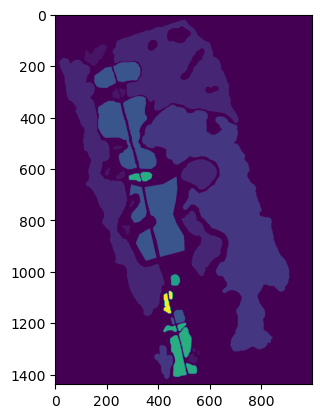

In [17]:
class_mask = skimage.io.imread(ann_files[6])
plt.imshow(class_mask)

In [18]:
merged_class_dict, merged_class_mask = annotation.merge_classes_with_mask(class_dict,class_mask,classes_to_merge,merged_class_names)

In [19]:
merged_class_dict

{'Zostera marina': 1,
 'Rockweed': 2,
 'Other algae': 3,
 'Sand': 4,
 'Zostera marina - NGT': 5,
 'Other algae - NGT': 6,
 'Rockweed - NGT': 7,
 'Mud': 8,
 'Gravel': 9,
 'Terrestrial': 10,
 'Zostera marina with turf algae': 11,
 'Mixed algae classes on soft substrate': 12}

In [38]:
filtered_class_dict, filtered_class_mask = annotation.extract_subset(merged_class_dict,merged_class_mask,classes_to_extract)

In [39]:
filtered_class_dict

{'Sand': 1,
 'Zostera marina': 2,
 'Zostera marina with turf algae': 3,
 'Rockweed': 4,
 'Other algae': 5,
 'Zostera marina - NGT': 6,
 'Rockweed - NGT': 7,
 'Other algae - NGT': 8}

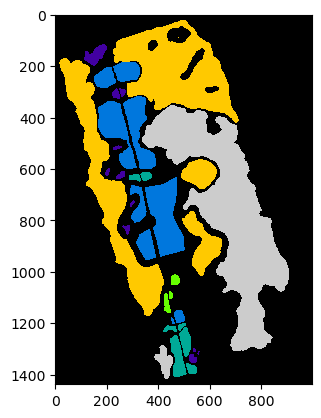

In [40]:
# plt.imshow(filtered_class_mask,cmap='gray',interpolation='none')
plt.imshow(filtered_class_mask,cmap='nipy_spectral',interpolation='none')

In [37]:
# filtered_class_mask[200,500]
filtered_class_mask[1020,470]

7

In [ ]:
hyspec_cnn.labeled_image_to_tensor_tiles()